# IAMC Reporting

In [1]:
import ixmp
import message_ix

#from message_data.model.material.report.reporting import report
from message_data.tools.post_processing.iamc_report_hackathon import (
    report as reporting)

import warnings
warnings.filterwarnings('ignore')

ssps = ["SSP5"]

setups = {'1000f with DAC':'1000f_v0.14',
          }

for ssp in ssps:
    for key,val in setups.items():
        print(ssp,'--',key)
        mp = ixmp.Platform()
        mo_name = f'SSP_dev_{ssp}_v0.1_dac-co2split'
        sc_name = val
        scen = message_ix.Scenario(mp, model=mo_name, scenario=sc_name)
        
        # report(scenario)
        print("Reporting standard variables")
        reporting(
            mp,
            scen,
            # NB(PNK) this is not an error; .iamc_report_hackathon.report() expects a
            #         string containing "True" or "False" instead of an actual bool.
            "False",
            scen.model,
            scen.scenario,
            merge_hist=True,
            merge_ts=True,
            run_config="SSP_dev_run_config.yaml",
        )
        mp.close_db()

<IPython.core.display.Javascript object>

C:\Users\pratama\Documents\GitHub\MESSAGEix\message_ix\message_ix\reporting\__init__.py:98: FutureWarning: Importing from genno.computations will be deprecated in a future version; use genno.operator instead.
  ("tom:nl-t-yv-ya", (genno.computations.add, "fom:nl-t-yv-ya", "vom:nl-t-yv-ya")),


SSP5 -- 1000f with DAC
Reporting standard variables
processing Table: Carbon Sequestration
processing Table: Investment|Carbon Sequestration
No unit conversion factor found to convert billion US$2010/yr to billion US$2010/yr
No unit conversion factor found to convert billion US$2010/yr to billion US$2010/yr
no emissions included
no emissions included
Starting to upload timeseries
    region                                           variable       unit  \
0  R12_AFR                           Carbon Sequestration|CCS  Mt CO2/yr   
1  R12_AFR                   Carbon Sequestration|CCS|Biomass  Mt CO2/yr   
2  R12_AFR     Carbon Sequestration|CCS|Biomass|Energy|Supply  Mt CO2/yr   
3  R12_AFR  Carbon Sequestration|CCS|Biomass|Energy|Supply...  Mt CO2/yr   
4  R12_AFR  Carbon Sequestration|CCS|Biomass|Energy|Supply...  Mt CO2/yr   

   2025  2030      2035     2040      2045       2050       2055        2060  \
0   0.0   0.0  0.607425  1.42346  9.893607  34.015037  93.685254  184.959523   


-- SSP5 --


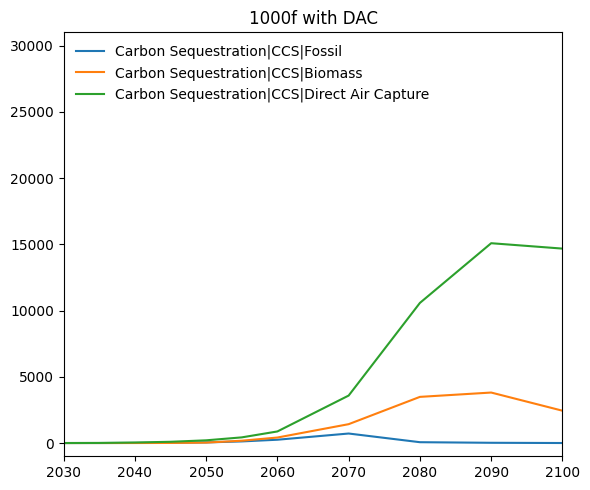

In [2]:
import numpy as np
import pandas as pd
import pyam
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

path = r'C:\Users\pratama\Documents\GitHub\MESSAGEix\message_data\reporting_output'

var_plot = [
    'Carbon Sequestration|CCS|Fossil',
    'Carbon Sequestration|CCS|Biomass',
    'Carbon Sequestration|CCS|Direct Air Capture'
]

for ssp in ssps:
    print('--',ssp,'--')
    fig, ax = plt.subplots(figsize=(6,5))
    for key,val in setups.items():
        fname = f'/SSP_dev_{ssp}_v0.1_dac-co2split_'+f'{val}.xlsx'
        df = pd.read_excel(path+fname)
        df = df.fillna('0')
        df = pyam.IamDataFrame(data=df)
        data = df.filter(region='World', variable=var_plot)
        
        data_plot = {var: list(data.filter(variable=var).timeseries().iloc[0])
                              for var in var_plot}
        
        years = list(data.timeseries().columns)

        for var in var_plot:
            ax.plot(years, data_plot[var], label=var)
        ax.set_title(key)
        
    ax.set_ylim(-1000,31000)
    ax.set_xlim(2030,2100)
    ax.legend(ncol=1, frameon=False, loc='upper left')
    
    plt.tight_layout()
    plt.show()

        

In [3]:
data.timeseries()

1990  \
model                          scenario    region variable                                    unit              
SSP_dev_SSP5_v0.1_dac-co2split 1000f_v0.14 World  Carbon Sequestration|CCS|Biomass            Mt CO2/yr   0.0   
                                                  Carbon Sequestration|CCS|Direct Air Capture Mt CO2/yr   0.0   
                                                  Carbon Sequestration|CCS|Fossil             Mt CO2/yr   0.0   

                                                                                                         1995  \
model                          scenario    region variable                                    unit              
SSP_dev_SSP5_v0.1_dac-co2split 1000f_v0.14 World  Carbon Sequestration|CCS|Biomass            Mt CO2/yr   0.0   
                                                  Carbon Sequestration|CCS|Direct Air Capture Mt CO2/yr   0.0   
                                                  Carbon Sequestration|CCS|Fossil             Mt CO2/yr   0.0   

                                                                                                         2000  \
model                          scenario    region variable                                    unit              
SSP_dev_SSP5_v0.1_dac-co2split 1000f_v0.14 World  Carbon Sequestration|CCS|Biomass            Mt CO2/yr   0.0   
                                                  Carbon Sequestration|CCS|Direct Air Capture Mt CO2/yr   0.0   
                                                  Carbon Sequestration|CCS|Fossil             Mt CO2/yr   0.0   

                                                                                                         2005  \
model                          scenario    region variable                                    unit              
SSP_dev_SSP5_v0.1_dac-co2split 1000f_v0.14 World  Carbon Sequestration|CCS|Biomass            Mt CO2/yr   0.0   
                                                  Carbon Sequestration|CCS|Direct Air Capture Mt CO2/yr   0.0   
                                                  Carbon Sequestration|CCS|Fossil             Mt CO2/yr   0.0   

                                                                                                         2010  \
model                          scenario    region variable                                    unit              
SSP_dev_SSP5_v0.1_dac-co2split 1000f_v0.14 World  Carbon Sequestration|CCS|Biomass            Mt CO2/yr   0.0   
                                                  Carbon Sequestration|CCS|Direct Air Capture Mt CO2/yr   0.0   
                                                  Carbon Sequestration|CCS|Fossil             Mt CO2/yr   0.0   

                                                                                                         2015  \
model                          scenario    region variable                                    unit              
SSP_dev_SSP5_v0.1_dac-co2split 1000f_v0.14 World  Carbon Sequestration|CCS|Biomass            Mt CO2/yr   0.0   
                                                  Carbon Sequestration|CCS|Direct Air Capture Mt CO2/yr   0.0   
                                                  Carbon Sequestration|CCS|Fossil             Mt CO2/yr   0.0   

                                                                                                         2020  \
model                          scenario    region variable                                    unit              
SSP_dev_SSP5_v0.1_dac-co2split 1000f_v0.14 World  Carbon Sequestration|CCS|Biomass            Mt CO2/yr   0.0   
                                                  Carbon Sequestration|CCS|Direct Air Capture Mt CO2/yr   0.0   
                                                  Carbon Sequestration|CCS|Fossil             Mt CO2/yr   0.0   

                                                                                                         2025  \
model                         